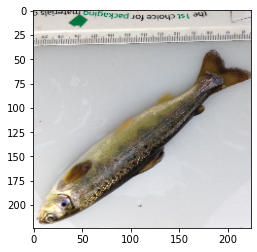

In [1]:
%matplotlib inline

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(r'C:\Users\cory.loch\Documents\MATLAB\Fish St\ML Project\Images\76.JPG')
img = cv2.resize(img, (224, 224)) # resize the image to 224 by 224
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

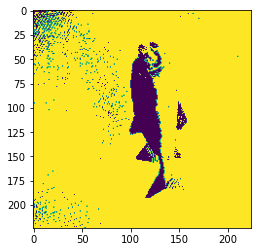

In [3]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_green = np.array([2, 4, 0])
upper_green = np.array([70, 225, 225])
mask = cv2.inRange(hsv, lower_green, upper_green)
plt.imshow(mask)

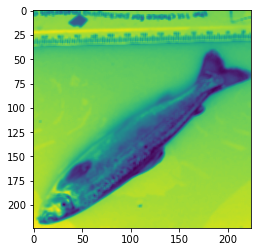

In [2]:
# Blur
blur = cv2.GaussianBlur(gray_img, (3,3), cv2.BORDER_DEFAULT)
plt.imshow(blur)

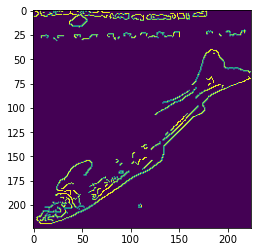

In [3]:
# Edge Cascade
canny = cv2.Canny(blur, 125, 175) # canny applied to blur reduces the number of edges found in the image
plt.imshow(canny)

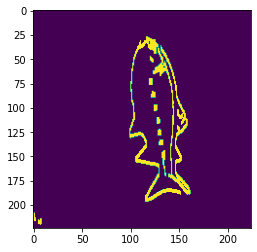

In [6]:
# dilating the image
dilated = cv2.dilate(canny, (3,3), iterations=3)
plt.imshow(dilated)

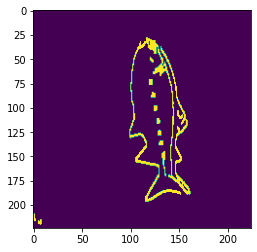

In [8]:
# Eroding (From dilated image to canny original)
eroded = cv2.erode(dilated, (3,3), iterations=1)
plt.imshow(eroded)

In [23]:
# Find Contours
contours, hierarchies = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(f'{len(contours)} contour(s) found!')

34 contour(s) found!


26 contour(s) found!


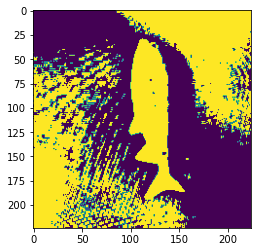

In [10]:
ret, thresh = cv2.threshold(blur, 125, 255, cv2.THRESH_BINARY) # Pixel value below 125 = black, above 125 set to 255
plt.imshow(thresh)
# Find Contours
contours, hierarchies = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(f'{len(contours)} contour(s) found!')

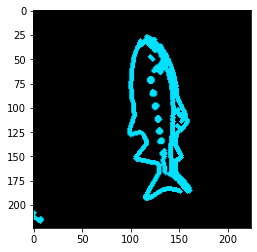

In [12]:
# Drawing Contours on image
blank = np.zeros(img.shape, dtype='uint8')
plt.imshow(blank)
drawn = cv2.drawContours(blank, contours, -1, (0,225,255), thickness=cv2.RETR_FLOODFILL)
plt.imshow(drawn)

Text(0.5, 1.0, 'Filled Mask')

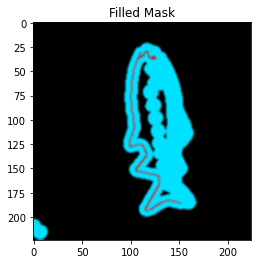

In [13]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
dilated = cv2.dilate(drawn, kernel)
plt.imshow(dilated)
drawn =cv2.drawContours(dilated, [max(contours, key = cv2.contourArea)], -1, 255, thickness=-1)
drawn = cv2.blur(drawn, (3,3)) # averages pixel values to completely fill mask
plt.imshow(drawn)
plt.title('Filled Mask')

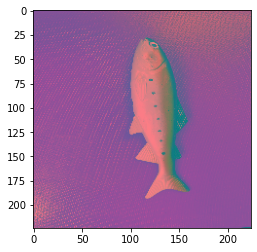

In [14]:
lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab) # Converts original image to L*a*b* colour scale
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2Lab))
l,a,b = cv2.split(lab) # Split the image color channels
merged = cv.merge([l,a]) # merges the two color channels

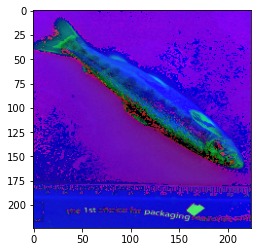

In [21]:
Hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # Converts original image to HSV color scale
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))

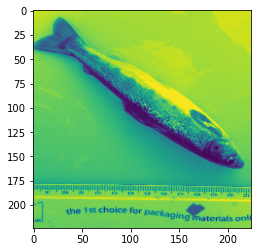

In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts the oriinal image to grayscale
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

Background Removal Process Followed (https://towardsdatascience.com/background-removal-with-python-b61671d1508a)

In [23]:
# Parameters
blur = 21 # Affects the smoothness of the dividing line
canny_low = 15 # Min intensity along which edges will be drawn
canny_high = 150 # maximum intensity along which edges will be drawn
min_area = 0.0005 # minimum area a contour in foreground may occupy
max_area = 0.95 # maximum area contour in foreground may occupy
dilate_iter = 10 # number of iterations of dilation will take place on mask
erode_iter = 10 # number of iterations of erosion will take place on the mask
mask_color = (0.0,0.0,0.0) # color of background once removed

In [24]:
# Convert image to grayscale
image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Apply Canny Edge Detection
edges = cv2.Canny(image_gray, canny_low, canny_high)

In [ ]:
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

In [ ]:
# get the contours and their areas
# This code either takes an incredibly long time to run or is bugging out somehow.
contour_info = [(c, cv2.contourArea(c),) for c in cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)[1]]

In [37]:
image_area = img.shape[0] * img.shape[1]

max_area = max_area * image_area
min_area = min_area * image_area

In [38]:
mask = np.zeros(edges.shape, dtype=np.uint8)

In [39]:
for contour in contour_info:
    if contour[1] > min_area and contour[1] < max_area:
        mask=cv2.fillConvexPoly(mask, contour[0], (255))

NameError: name 'contour_info' is not defined

In [33]:
# use dilate, erode and blur to smooth out the mask

mask = cv2.dilate(mask, None, iterations=dilate_iter)
mask = cv2.erode(mask, None, iterations=erode_iter)
mask = cv2.GaussianBlur(mask, (blur,blur), 0)

In [34]:
# Ensures data types match up
mask_stack = mask_stack.astype('float32') / 255.0
img = img.astype('float32') / 255.0

NameError: name 'mask_stack' is not defined

In [ ]:
# Blend the image and the mask

masked = (mask_stack * img) + ((1-mask_stack) * mask_color)
masked = (masked * 255).astype('uint8')

plt.imshow(masked) # Display the masked image

In [2]:
threshold = (0, 255, 0)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshed = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY_INV)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
morphed = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, kernel)

cnts = cv2.findContours(morphed,
                        cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)[0]

cnt = sorted(cnts, key=cv2.contourArea)[-1]

mask = cv2.drawContours(threshed, cnt, 0, (0, 255, 0), 0)
masked_data = cv2.bitwise_and(img, img, mask=mask)

x, y, w, h = cv2.boundingRect(cnt)
dst = masked_data[y: y + h, x: x + w]

dst_gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
_, alpha = cv2.threshold(dst_gray, 0, 255, cv2.THRESH_BINARY)
b, g, r = cv2.split(dst)

rgba = [r, g, b, alpha]
dst = cv2.merge(rgba, 4)

TypeError: must be real number, not tuple